## Bigger is better
So they say in mechanical engineering.

Let's try different improvements for size.

### Bigger images
First we increase the images.


In [1]:
from fastcore.all import *
from fastai.vision.all import *

In [2]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(256, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

dls = cheese.dataloaders("working/which_cheese_cleaned")

In [3]:
learn_better = vision_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.0014454397605732083)

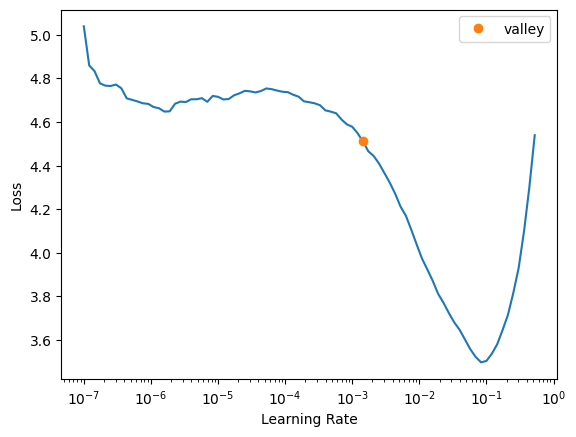

In [20]:
learn_better.lr_find()

In [14]:
free_cuda_memory("learn_better",globals())

Variable 'learn_better' not found in globals.


In [4]:
learn_better.fine_tune(20, 1.4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.494530,2.704004,0.224390,00:03


epoch,train_loss,valid_loss,accuracy,time
0,3.569352,2.406130,0.287805,00:03
1,3.397068,2.129410,0.390244,00:03
2,3.140578,1.792163,0.487805,00:03
3,2.888480,1.442425,0.575610,00:03
4,2.601342,1.208380,0.639024,00:03
5,2.329871,1.035105,0.663415,00:03
6,2.098733,0.926281,0.751220,00:03
7,1.877111,0.871198,0.746341,00:03
8,1.670984,0.787981,0.790244,00:03
9,1.530837,0.742606,0.780488,00:03


We clearly have hit a new record. Almost 80%. After 20 epochs the end of goal post seems to have been reached. In another run I had 82%.

### Bigger Model

Instead of the images we can increase the model, we will go for `resnet34`.

In [22]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(192, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

dls = cheese.dataloaders("working/which_cheese_cleaned")

In [23]:
learn_better = vision_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(valley=0.0020892962347716093)

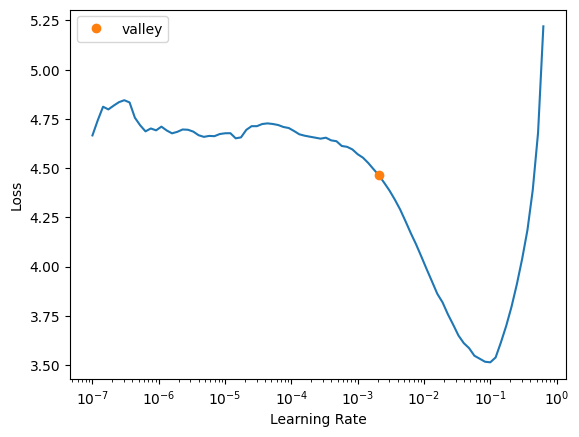

In [24]:
learn_better.lr_find()

In [25]:
learn_better.fine_tune(20, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.319314,2.530106,0.243902,00:02


epoch,train_loss,valid_loss,accuracy,time
0,3.351670,2.044574,0.380488,00:03
1,3.058213,1.685639,0.507317,00:03
2,2.746131,1.313843,0.639024,00:03
3,2.436243,1.013334,0.731707,00:03
4,2.142230,0.840266,0.775610,00:03
5,1.898090,0.805258,0.770732,00:03
6,1.671135,0.764192,0.800000,00:03
7,1.478277,0.738444,0.809756,00:03
8,1.305836,0.683891,0.785366,00:03
9,1.142530,0.632159,0.790244,00:03


In [26]:
learn_better = vision_learner(dls, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/dominik/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:15<00:00, 6.56MB/s]


SuggestedLRs(valley=0.0010000000474974513)

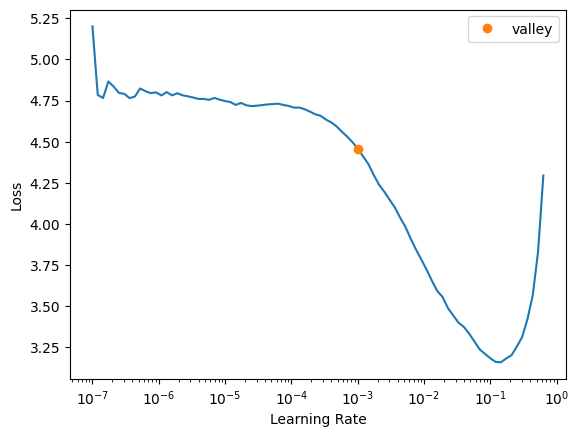

In [27]:
learn_better.lr_find()

In [28]:
learn_better.fine_tune(20, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.393582,2.744330,0.204878,00:04


epoch,train_loss,valid_loss,accuracy,time
0,3.321695,2.486286,0.287805,00:06
1,3.125788,2.221527,0.356098,00:06
2,2.849939,1.930392,0.439024,00:06
3,2.639139,1.629388,0.502439,00:06
4,2.387037,1.396374,0.600000,00:06
5,2.145477,1.242509,0.648780,00:06
6,1.933496,1.132375,0.687805,00:06
7,1.738567,1.025986,0.717073,00:06
8,1.557685,0.977237,0.756098,00:06
9,1.412416,0.930118,0.765854,00:06


Remarkebly the bigger model `resnet34` also can archieve 81% and the training is better converging.
In contrast the even bigger `resnet50` is producing worse results. This could be due to limited amount of data.

Let's see how the big model handels big images.

In [29]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(256, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

dls = cheese.dataloaders("working/which_cheese_cleaned")
learn_better = vision_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(valley=0.0006918309954926372)

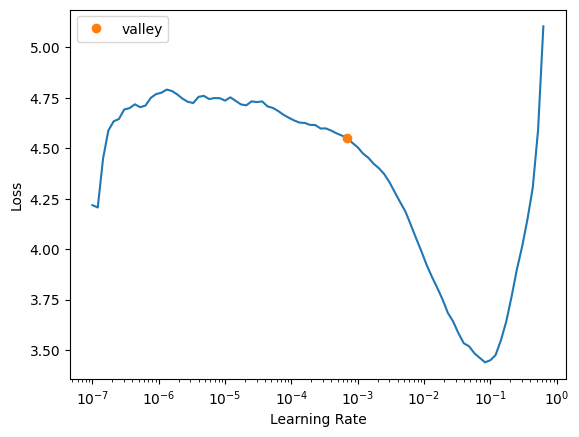

In [30]:
learn_better.lr_find()

In [31]:
learn_better.fine_tune(20, 6.9e-4)

epoch,train_loss,valid_loss,accuracy,time
0,4.543718,3.211622,0.092683,00:04


epoch,train_loss,valid_loss,accuracy,time
0,4.034224,2.881157,0.180488,00:05
1,3.940435,2.636389,0.229268,00:05
2,3.715499,2.337412,0.326829,00:05
3,3.486756,1.973952,0.429268,00:05
4,3.248124,1.657461,0.507317,00:05
5,2.996700,1.410418,0.595122,00:05
6,2.718238,1.225778,0.673171,00:05
7,2.460284,1.119877,0.697561,00:05
8,2.235554,1.047230,0.692683,00:05
9,2.015765,0.982388,0.717073,00:05


First, it needs to be noted that the learning rate is lower. But also the results are worse than for `resnet18`.

### Even bigger images

We will increase the images even further. We initially resized our images to 400px, so there is no point in going larger than 312px.

In [32]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(312, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

dls = cheese.dataloaders("working/which_cheese_cleaned")
learn_better = vision_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

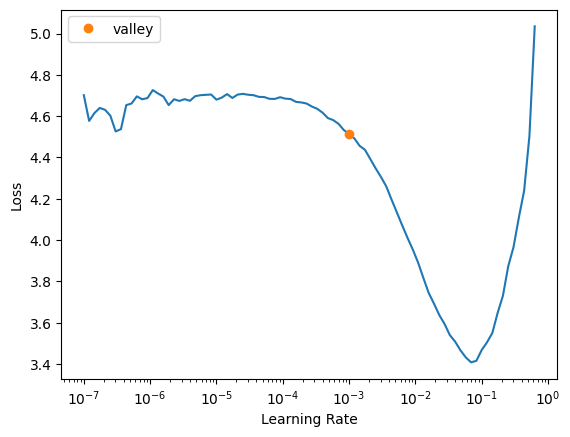

In [33]:
learn_better.lr_find()

In [34]:
learn_better.fine_tune(20, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.543712,3.039113,0.146341,00:06


epoch,train_loss,valid_loss,accuracy,time
0,3.761286,2.706118,0.234146,00:07
1,3.621768,2.441219,0.297561,00:07
2,3.425048,2.090192,0.409756,00:08
3,3.118869,1.713392,0.507317,00:07
4,2.836166,1.382881,0.585366,00:07
5,2.560673,1.180610,0.629268,00:07
6,2.283780,1.015514,0.697561,00:07
7,2.033190,0.904861,0.736585,00:07
8,1.819672,0.865400,0.731707,00:07
9,1.640550,0.837150,0.736585,00:07


In [35]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(312, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

dls = cheese.dataloaders("working/which_cheese_cleaned")
learn_better = vision_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

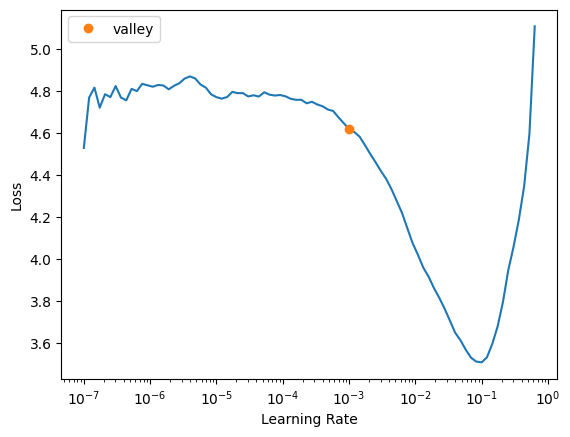

In [36]:
learn_better.lr_find()

In [37]:
learn_better.fine_tune(20, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.559435,2.919010,0.170732,00:04


epoch,train_loss,valid_loss,accuracy,time
0,3.794993,2.674616,0.239024,00:05
1,3.646426,2.417594,0.307317,00:05
2,3.475905,2.064787,0.375610,00:05
3,3.235945,1.699186,0.502439,00:05
4,2.987770,1.406921,0.560976,00:05
5,2.700939,1.190468,0.643902,00:05
6,2.444276,1.058556,0.712195,00:05
7,2.220634,0.985898,0.726829,00:05
8,2.032653,0.906098,0.760976,00:05
9,1.847860,0.848331,0.765854,00:05


Interestingly the even bigger size brings the bigger model to slight advantage, but not much. 

It could be that the bigger model has a better capacity to learn from more data. Whereas the smaller model generalizes better on a smaller dataset.
This has also been observed in research: https://en.wikipedia.org/wiki/Neural_scaling_law.
 Larger models often perform better with more data due to their capacity to learn complex patterns, while smaller models may generalize better on smaller datasets, reducing overfitting.

### Label smoothing

Finally we will try the size togehter with the label smoothing.


In [38]:
cheese = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(312, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))
dls = cheese.dataloaders("working/which_cheese_cleaned")
learn_better = vision_learner(dls, resnet18, metrics=accuracy, loss_func=LabelSmoothingCrossEntropy())


SuggestedLRs(valley=0.0014454397605732083)

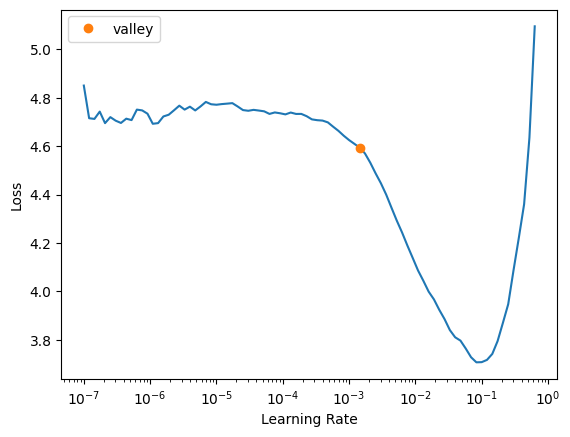

In [39]:
learn_better.lr_find()

In [40]:
learn_better.fine_tune(20, 1.4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.394593,2.871440,0.229268,00:04


epoch,train_loss,valid_loss,accuracy,time
0,3.653049,2.588406,0.317073,00:05
1,3.530752,2.326544,0.365854,00:05
2,3.368824,2.011567,0.502439,00:05
3,3.158019,1.743854,0.590244,00:05
4,2.937979,1.583111,0.668293,00:05
5,2.703008,1.478423,0.707317,00:05
6,2.499692,1.461678,0.785366,00:05
7,2.328650,1.402460,0.770732,00:05
8,2.176972,1.380992,0.760976,00:05
9,2.045058,1.355799,0.751220,00:05


Sadly the LabelSmoothing only improved the convergence. The final score is not better than the initial try with bigger images.

In [6]:
def free_cuda_memory(var_name, globals_dict, max_attempts=5, delay=0.5):
    """
    Deletes a variable by name, collects garbage, and repeatedly clears CUDA memory until freed.
    
    Args:
        var_name (str): Name of the variable to delete.
        globals_dict (dict): Pass `globals()` to delete from the global scope.
        max_attempts (int): Maximum attempts to clear memory.
        delay (float): Time (in seconds) to wait between attempts.
    """
    import torch
    import gc
    import time
    if var_name in globals_dict:
        del globals_dict[var_name]
    else:
        print(f"Variable '{var_name}' not found in globals.")
        return

    for _ in range(max_attempts):
        gc.collect()
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
        time.sleep(delay)

        # Check if memory is freed
        allocated = torch.cuda.memory_allocated()
        cached = torch.cuda.memory_reserved()

        if allocated == 0 and cached == 0:
            print("CUDA memory successfully freed.")
            return
    
    print("Warning: Some CUDA memory may still be blocked.")
    print(f"Allocated: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
    print(f"Cached: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
